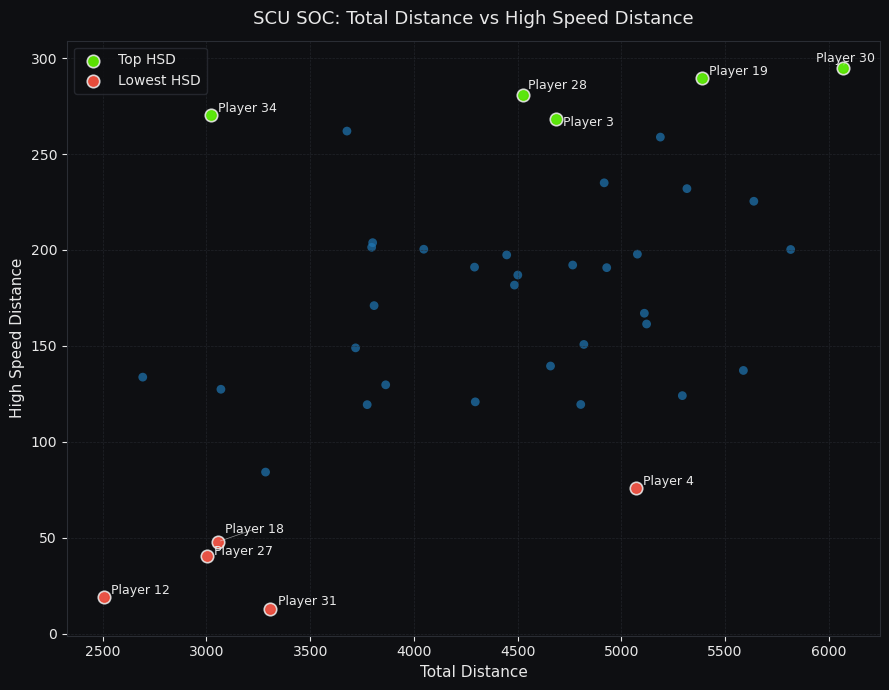

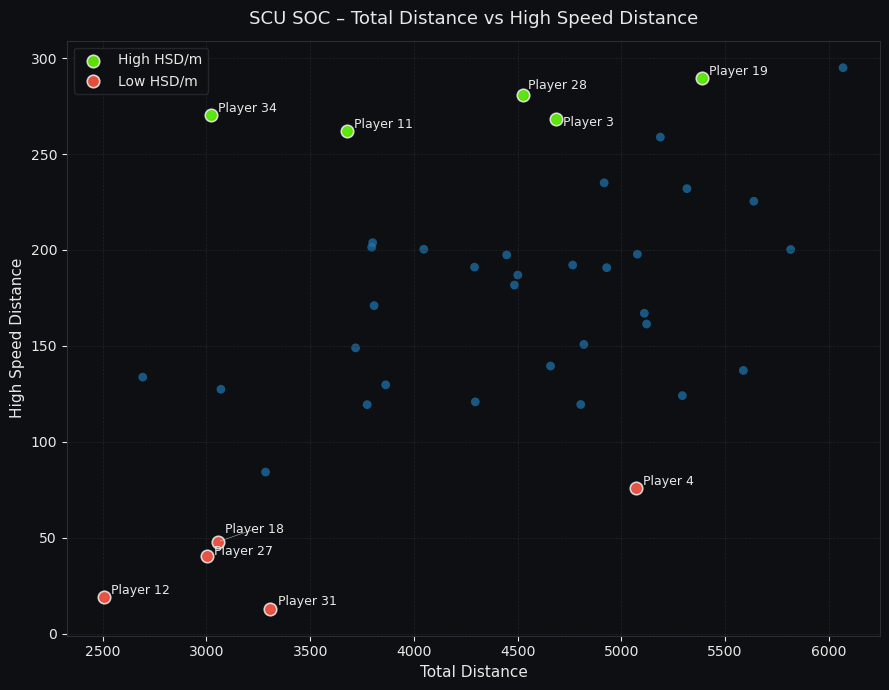

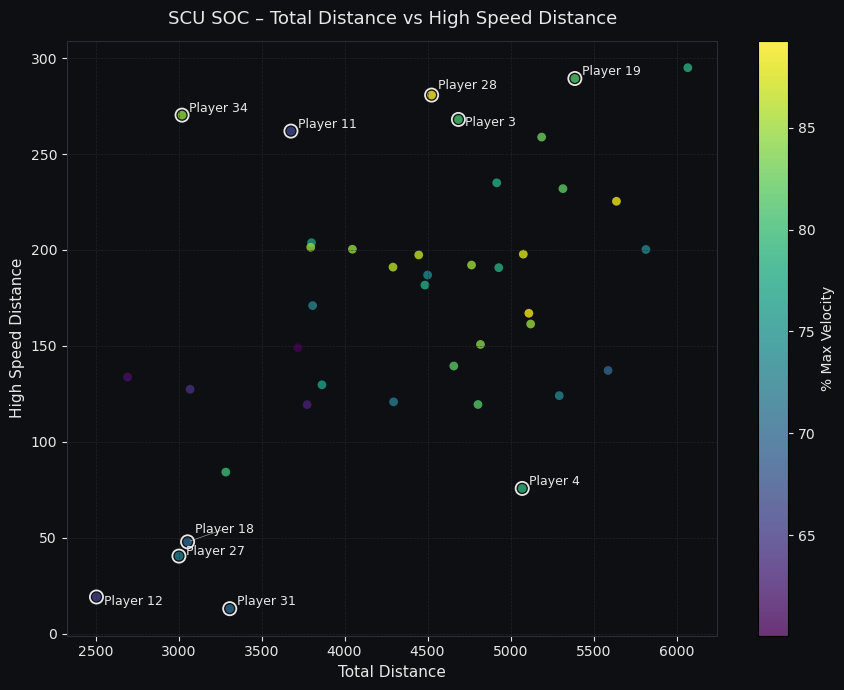

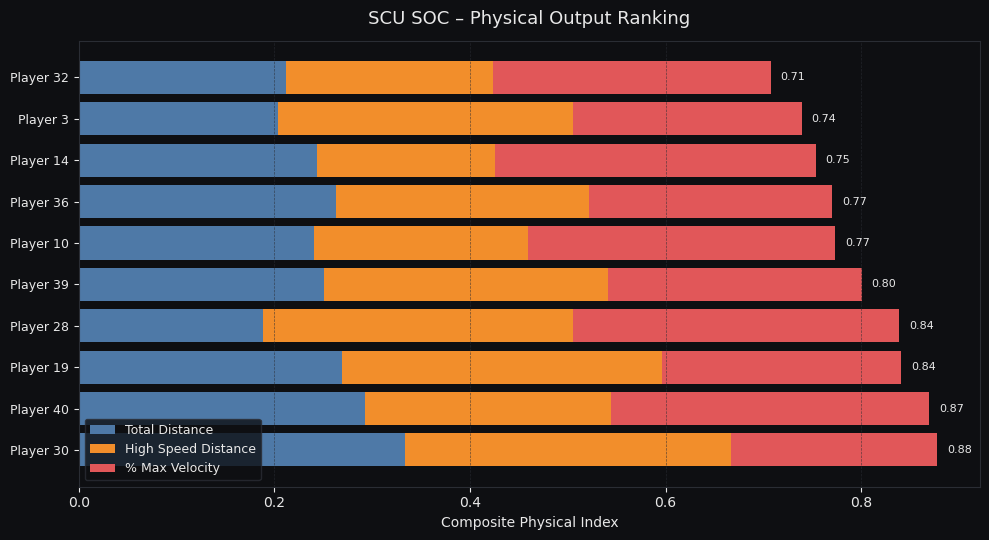

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

BG_COLOR = "#0e0f12"
FG_COLOR = "#e8e8e8"
GRID_COLOR = "#2a2d34"
HIGHLIGHT_COLOR = "#63f700"
BOTTOM_COLOR = "#ff5340"

try:
    from adjustText import adjust_text
    _USE_ADJUST_TEXT = True
except Exception:
    _USE_ADJUST_TEXT = False

def load_player_profiles(csv_path: str = "player_profiles.csv") -> pd.DataFrame:

    df = pd.read_csv(csv_path)
    
    required_cols = {"player_name", "total_distance", "high_speed_distance"}
    missing = required_cols - set(df.columns)
    if missing:
        raise ValueError(f"CSV is missing required columns: {missing}")
    
    return df

def plot_total_vs_high_speed(
    df: pd.DataFrame,
    highlight_top_n: int = 5,
    highlight_bottom_n: int = 5,
    team_label: str = "Team",
    save_path: str | None = None
):

    df_sorted_desc = df.sort_values("high_speed_distance", ascending=False)
    df_sorted_asc  = df.sort_values("high_speed_distance", ascending=True)

    top_df = df_sorted_desc.head(highlight_top_n)

    if "player_id" in df.columns:
        bottom_df = df_sorted_asc[~df_sorted_asc["player_id"].isin(top_df["player_id"])]
    else:
        bottom_df = df_sorted_asc[~df_sorted_asc["player_name"].isin(top_df["player_name"])]

    bottom_df = bottom_df.head(highlight_bottom_n)

    fig, ax = plt.subplots(figsize=(9, 7))
    fig.patch.set_facecolor(BG_COLOR)
    ax.set_facecolor(BG_COLOR)

    ax.scatter(
        df["total_distance"],
        df["high_speed_distance"],
        s=40,
        alpha=0.7,
        edgecolor="none"
    )

    ax.scatter(
        top_df["total_distance"],
        top_df["high_speed_distance"],
        s=80,
        edgecolor=FG_COLOR,
        linewidth=1.2,
        color=HIGHLIGHT_COLOR,
        alpha=0.9,
        zorder=3,
        label="Top HSD"
    )

    ax.scatter(
        bottom_df["total_distance"],
        bottom_df["high_speed_distance"],
        s=80,
        edgecolor=FG_COLOR,
        linewidth=1.2,
        color=BOTTOM_COLOR,
        alpha=0.9,
        zorder=3,
        label="Lowest HSD"
    )

    texts = []
    for _, row in top_df.iterrows():
        texts.append(
            ax.text(
                row["total_distance"],
                row["high_speed_distance"],
                row["player_name"],
                fontsize=9,
                color=FG_COLOR,
            )
        )

    for _, row in bottom_df.iterrows():
        texts.append(
            ax.text(
                row["total_distance"],
                row["high_speed_distance"],
                row["player_name"],
                fontsize=9,
                color=FG_COLOR,
            )
        )

    if _USE_ADJUST_TEXT and texts:
        adjust_text(
            texts,
            only_move={"points": "y", "text": "xy"},
            autoalign="y",
            ax=ax,
            arrowprops=dict(arrowstyle="-", color=FG_COLOR, lw=0.5, alpha=0.6),
        )

    ax.set_xlabel("Total Distance", color=FG_COLOR, fontsize=11)
    ax.set_ylabel("High Speed Distance", color=FG_COLOR, fontsize=11)
    ax.set_title(
        f"{team_label}: Total Distance vs High Speed Distance",
        color=FG_COLOR,
        fontsize=13,
        pad=12,
    )

    ax.tick_params(colors=FG_COLOR)
    for spine in ax.spines.values():
        spine.set_edgecolor(GRID_COLOR)

    ax.grid(True, color=GRID_COLOR, linestyle="--", linewidth=0.5, alpha=0.7)

    # Legend
    ax.legend(facecolor=BG_COLOR, edgecolor=GRID_COLOR, labelcolor=FG_COLOR)

    fig.tight_layout()

    if save_path is not None:
        fig.savefig(save_path, dpi=200, facecolor=BG_COLOR, bbox_inches="tight")

    return fig, ax

df = load_player_profiles("player_profiles.csv")
fig, ax = plot_total_vs_high_speed(df, highlight_top_n=5, highlight_bottom_n=5, team_label="SCU SOC")
plt.show()

def plot_total_vs_high_speed_ratio(
    df: pd.DataFrame,
    highlight_top_n: int = 5,
    highlight_bottom_n: int = 5,
    team_label: str = "Team",
    save_path: str | None = None
):

    df = df.copy()

    td = df["total_distance"].astype(float)
    hsd = df["high_speed_distance"].astype(float)

    df["hsr_ratio"] = 0.0
    nonzero_mask = td > 0
    df.loc[nonzero_mask, "hsr_ratio"] = hsd[nonzero_mask] / td[nonzero_mask]

    df_sorted_desc = df.sort_values("hsr_ratio", ascending=False)
    df_sorted_asc  = df.sort_values("hsr_ratio", ascending=True)

    top_df = df_sorted_desc.head(highlight_top_n)

    if "player_id" in df.columns:
        bottom_df = df_sorted_asc[~df_sorted_asc["player_id"].isin(top_df["player_id"])]
    else:
        bottom_df = df_sorted_asc[~df_sorted_asc["player_name"].isin(top_df["player_name"])]

    bottom_df = bottom_df.head(highlight_bottom_n)

    fig, ax = plt.subplots(figsize=(9, 7))
    fig.patch.set_facecolor(BG_COLOR)
    ax.set_facecolor(BG_COLOR)

    ax.scatter(
        df["total_distance"],
        df["high_speed_distance"],
        s=40,
        alpha=0.7,
        edgecolor="none"
    )

    ax.scatter(
        top_df["total_distance"],
        top_df["high_speed_distance"],
        s=80,
        edgecolor=FG_COLOR,
        linewidth=1.2,
        color=HIGHLIGHT_COLOR,
        alpha=0.9,
        zorder=3,
        label="High HSD/m"
    )

    ax.scatter(
        bottom_df["total_distance"],
        bottom_df["high_speed_distance"],
        s=80,
        edgecolor=FG_COLOR,
        linewidth=1.2,
        color=BOTTOM_COLOR,
        alpha=0.9,
        zorder=3,
        label="Low HSD/m"
    )

    texts = []
    for _, row in top_df.iterrows():
        label = f"{row['player_name']}"
        texts.append(
            ax.text(
                row["total_distance"],
                row["high_speed_distance"],
                label,
                fontsize=9,
                color=FG_COLOR,
            )
        )

    for _, row in bottom_df.iterrows():
        label = f"{row['player_name']}"
        texts.append(
            ax.text(
                row["total_distance"],
                row["high_speed_distance"],
                label,
                fontsize=9,
                color=FG_COLOR,
            )
        )

    if _USE_ADJUST_TEXT and texts:
        adjust_text(
            texts,
            only_move={"points": "y", "text": "xy"},
            autoalign="y",
            ax=ax,
            arrowprops=dict(arrowstyle="-", color=FG_COLOR, lw=0.5, alpha=0.6),
        )

    ax.set_xlabel("Total Distance", color=FG_COLOR, fontsize=11)
    ax.set_ylabel("High Speed Distance", color=FG_COLOR, fontsize=11)
    ax.set_title(
        f"{team_label} – Total Distance vs High Speed Distance",
        color=FG_COLOR,
        fontsize=13,
        pad=12,
    )

    ax.tick_params(colors=FG_COLOR)
    for spine in ax.spines.values():
        spine.set_edgecolor(GRID_COLOR)

    ax.grid(True, color=GRID_COLOR, linestyle="--", linewidth=0.5, alpha=0.7)

    ax.legend(facecolor=BG_COLOR, edgecolor=GRID_COLOR, labelcolor=FG_COLOR)

    fig.tight_layout()

    if save_path is not None:
        fig.savefig(save_path, dpi=200, facecolor=BG_COLOR, bbox_inches="tight")

    return fig, ax

df = load_player_profiles("player_profiles.csv")
fig, ax = plot_total_vs_high_speed_ratio(
    df,
    highlight_top_n=5,
    highlight_bottom_n=5,
    team_label="SCU SOC"
)
plt.show()

def plot_total_vs_hsr_with_pmv(
    df: pd.DataFrame,
    highlight_top_n: int = 5,
    highlight_bottom_n: int = 5,
    team_label: str = "Team",
    save_path: str | None = None
):

    df = df.copy()

    required_cols = {
        "player_name",
        "total_distance",
        "high_speed_distance",
        "percentage_max_velocity",
    }
    missing = required_cols - set(df.columns)
    if missing:
        raise ValueError(f"DataFrame is missing required columns: {missing}")

    td = df["total_distance"].astype(float)
    hsd = df["high_speed_distance"].astype(float)

    df["hsr_ratio"] = 0.0
    nonzero_mask = td > 0
    df.loc[nonzero_mask, "hsr_ratio"] = hsd[nonzero_mask] / td[nonzero_mask]

    df_sorted_desc = df.sort_values("hsr_ratio", ascending=False)
    df_sorted_asc  = df.sort_values("hsr_ratio", ascending=True)

    top_df = df_sorted_desc.head(highlight_top_n)

    if "player_id" in df.columns:
        bottom_df = df_sorted_asc[~df_sorted_asc["player_id"].isin(top_df["player_id"])]
    else:
        bottom_df = df_sorted_asc[~df_sorted_asc["player_name"].isin(top_df["player_name"])]

    bottom_df = bottom_df.head(highlight_bottom_n)

    fig, ax = plt.subplots(figsize=(9, 7))
    fig.patch.set_facecolor(BG_COLOR)
    ax.set_facecolor(BG_COLOR)

    sc = ax.scatter(
        df["total_distance"],
        df["high_speed_distance"],
        c=df["percentage_max_velocity"],
        s=40,
        alpha=0.8,
        edgecolor="none",
        cmap="viridis"
    )

    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label("% Max Velocity", color=FG_COLOR)
    cbar.ax.yaxis.set_tick_params(color=FG_COLOR)
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color=FG_COLOR)

    ax.scatter(
        top_df["total_distance"],
        top_df["high_speed_distance"],
        s=90,
        edgecolor=FG_COLOR,
        linewidth=1.3,
        facecolor="none",
        zorder=3,
        label="High HSR / m"
    )

    ax.scatter(
        bottom_df["total_distance"],
        bottom_df["high_speed_distance"],
        s=90,
        edgecolor=FG_COLOR,
        linewidth=1.3,
        facecolor="none",
        zorder=3,
        label="Low HSR / m"
    )

    texts = []
    for _, row in top_df.iterrows():
        texts.append(
            ax.text(
                row["total_distance"],
                row["high_speed_distance"],
                row["player_name"],
                fontsize=9,
                color=FG_COLOR,
            )
        )

    for _, row in bottom_df.iterrows():
        texts.append(
            ax.text(
                row["total_distance"],
                row["high_speed_distance"],
                row["player_name"],
                fontsize=9,
                color=FG_COLOR,
            )
        )

    if _USE_ADJUST_TEXT and texts:
        adjust_text(
            texts,
            only_move={"points": "y", "text": "xy"},
            autoalign="y",
            ax=ax,
            arrowprops=dict(arrowstyle="-", color=FG_COLOR, lw=0.5, alpha=0.6),
        )

    ax.set_xlabel("Total Distance", color=FG_COLOR, fontsize=11)
    ax.set_ylabel("High Speed Distance", color=FG_COLOR, fontsize=11)
    ax.set_title(
        f"{team_label} – Total Distance vs High Speed Distance",
        color=FG_COLOR,
        fontsize=13,
        pad=12,
    )

    ax.tick_params(colors=FG_COLOR)
    for spine in ax.spines.values():
        spine.set_edgecolor(GRID_COLOR)

    ax.grid(True, color=GRID_COLOR, linestyle="--", linewidth=0.5, alpha=0.7)

    fig.tight_layout()

    if save_path is not None:
        fig.savefig(save_path, dpi=200, facecolor=BG_COLOR, bbox_inches="tight")

    return fig, ax

df = load_player_profiles("player_profiles.csv")

fig, ax = plot_total_vs_hsr_with_pmv(
    df,
    highlight_top_n=5,
    highlight_bottom_n=5,
    team_label="SCU SOC"
)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

BG_COLOR = "#0e0f12"
FG_COLOR = "#e8e8e8"
GRID_COLOR = "#2a2d34"

TD_COLOR   = "#4e79a7"
HSD_COLOR  = "#f28e2b"
PMV_COLOR  = "#e15759"


def load_player_profiles(csv_path: str = "player_profiles.csv") -> pd.DataFrame:
    """
    Load player profile CSV exported by your Catapult pipeline.
    """
    df = pd.read_csv(csv_path)
    return df


def plot_physical_index_components(
    csv_path: str = "player_profiles.csv",
    team_label: str = "SCU SOC",
    top_n: int | None = None
):

    df = load_player_profiles(csv_path)

    required_cols = {
        "player_name",
        "total_distance",
        "high_speed_distance",
        "percentage_max_velocity",
    }
    missing = required_cols - set(df.columns)
    if missing:
        raise ValueError(f"CSV is missing required columns: {missing}")

    for col in ["total_distance", "high_speed_distance", "percentage_max_velocity"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    df = df.dropna(
        subset=["total_distance", "high_speed_distance", "percentage_max_velocity"]
    ).reset_index(drop=True)

    def scale_col(s: pd.Series) -> pd.Series:
        mn, mx = s.min(), s.max()
        if mx == mn:
            return pd.Series(0.5, index=s.index)
        return (s - mn) / (mx - mn)

    df["td_scaled"]  = scale_col(df["total_distance"])
    df["hsd_scaled"] = scale_col(df["high_speed_distance"])
    df["pmv_scaled"] = scale_col(df["percentage_max_velocity"])

    w_td, w_hsd, w_pmv = 1/3, 1/3, 1/3
    df["td_contrib"]  = w_td  * df["td_scaled"]
    df["hsd_contrib"] = w_hsd * df["hsd_scaled"]
    df["pmv_contrib"] = w_pmv * df["pmv_scaled"]

    df["physical_index"] = df["td_contrib"] + df["hsd_contrib"] + df["pmv_contrib"]

    df_sorted = df.sort_values("physical_index", ascending=False)

    if top_n is not None:
        df_sorted = df_sorted.head(top_n)

    n_players = len(df_sorted)
    fig_height = max(4, 0.45 * n_players + 1)

    fig, ax = plt.subplots(figsize=(10, fig_height))
    fig.patch.set_facecolor(BG_COLOR)
    ax.set_facecolor(BG_COLOR)

    y_pos = range(n_players)

    ax.barh(
        y_pos,
        df_sorted["td_contrib"],
        color=TD_COLOR,
        label="Total Distance",
    )
    ax.barh(
        y_pos,
        df_sorted["hsd_contrib"],
        left=df_sorted["td_contrib"],
        color=HSD_COLOR,
        label="High Speed Distance",
    )
    ax.barh(
        y_pos,
        df_sorted["pmv_contrib"],
        left=df_sorted["td_contrib"] + df_sorted["hsd_contrib"],
        color=PMV_COLOR,
        label="% Max Velocity",
    )

    ax.set_yticks(list(y_pos))
    ax.set_yticklabels(df_sorted["player_name"], color=FG_COLOR, fontsize=9)

    ax.set_xlabel("Composite Physical Index", color=FG_COLOR)
    ax.set_title(
        f"{team_label} – Physical Output Ranking",
        color=FG_COLOR,
        fontsize=13,
        pad=12,
    )

    ax.tick_params(colors=FG_COLOR)
    for spine in ax.spines.values():
        spine.set_edgecolor(GRID_COLOR)

    ax.grid(axis="x", color=GRID_COLOR, linestyle="--", linewidth=0.5, alpha=0.7)

    for i, (_, row) in enumerate(df_sorted.iterrows()):
        total = row["physical_index"]
        ax.text(
            total + 0.01,
            i,
            f"{total:.2f}",
            va="center",
            ha="left",
            color=FG_COLOR,
            fontsize=8,
        )

    legend = ax.legend(
        facecolor=BG_COLOR,
        edgecolor=GRID_COLOR,
        fontsize=9,
        loc="lower left",
    )
    for text in legend.get_texts():
        text.set_color(FG_COLOR)

    fig.tight_layout()
    plt.show()

    return fig, ax


fig, ax = plot_physical_index_components(
    csv_path="player_profiles.csv",
    team_label="SCU SOC",
    top_n=10,
)


